# Klein-Gordon in Coulomb Potential

Plots based in:

Author: Sebastian Mag. | Date: Oct 04/2022,
Source code: https://github.com/cmd098/hydrogen-wavefunctions

In [711]:
import matplotlib, matplotlib.pyplot as plt
import scipy, scipy.special as sp
import seaborn as sns
import numpy as np
import numpy.linalg as npl
import math
import os

In [712]:
me=0.510 #in Mev
m=139.57039 #in Mev
c=1
hbar=1
Z=1
e0=-1.602e-19
alpha=1/(137.035999084)

In [713]:
r=np.linspace(1e-25,20,10000)

In [714]:
plt.rcParams['font.family'] = 'STIXGeneral'
plt.rcParams['mathtext.fontset'] = 'stix'

In [715]:
def angular_function(lproy, l, theta, phi):
    legendre = sp.lpmv(lproy, l, np.cos(theta))
    m=lproy
    return ((-1) ** m) * np.sqrt(
        ((2 * l + 1) * np.math.factorial(l - np.abs(m)))
        / (4 * np.pi * np.math.factorial(l + np.abs(m)))) * legendre * np.real(np.exp(1.j * m * phi))

In [716]:
def Energy(m,n,l,Z,alpha):
    RE=m*c**2
    rest=(1+(Z**2*alpha**2)/((n-l-0.5+(((l+0.5)**2)-(Z*alpha)**2)**0.5))**2)**(-0.5)
    return RE*rest

In [717]:
def Beta(m,n,l,Z,alpha):
    return (2/hbar*c)*(m**2*c**4 - Energy(m,n,l,Z,alpha)**2)**0.5

In [718]:
def mu(l,Z,alpha):
    return np.sqrt((l+0.5)**2-(Z*alpha)**2)

In [719]:
def lam(m,n,l,Z,alpha):
    return (2*Z*alpha*Energy(m,n,l,Z,alpha))/(hbar*c*Beta(m,n,l,Z,alpha))

In [720]:
lam(m,1,0,Z=Z,alpha=alpha)

0.9999467458068234

In [721]:
m*c**2-Energy(m,1,0,10,alpha) # Energy for n=1, l=0 and Z=10 as in the Greiner's Book

0.3741172892699751

In [722]:
int(mu(l=0,Z=Z,alpha=alpha)+0.5-lam(m,1,0,Z=Z,alpha=alpha))

0

In [723]:
def wittaker(a,b,x):
    sum=1       #Fixing a0=1
    i=0
    while True:
        if i+int(a)==0:
            break
        else:
            sum+=sp.poch(round(a,4),i)*x**i/(sp.poch(round(b,4),i)*math.factorial(i))
            i+=1
    return sum

n=2
l=1
a=mu(l,Z,alpha)+0.5-lam(m,n,l,Z,alpha)
c=2*mu(l,Z,alpha)+1
wittaker(a,c,Beta(m,n,l,Z,alpha)*r)

In [724]:
def radialFunction(m,n,l,Z,alpha,r):
    parteb=Beta(m,n,l,Z,alpha)**(mu(l,Z,alpha)+0.5)
    parter=r**(mu(l,Z,alpha)-0.5)
    partee=np.exp(-0.5*r*Beta(m,n,l,Z,alpha))
    a=mu(l,Z,alpha)+0.5-lam(m,n,l,Z,alpha)
    c=2*mu(l,Z,alpha)+1
    partehf=wittaker(a,c,Beta(m,n,l,Z,alpha)*r)
    total=parteb*parter*partee*partehf
    #norm=total*r**2
    return total

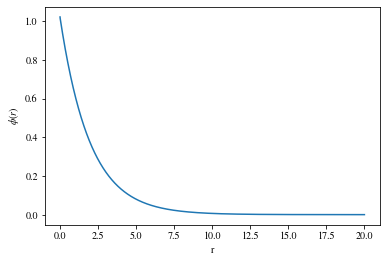

In [725]:
phi=radialFunction(m,n=2,l=0,Z=Z,alpha=alpha,r=r)
plt.plot(r,phi)
plt.xlabel('r')
plt.ylabel(r'$\phi(r)$')
plt.show()

In [726]:
def wavefunction(m,n,l,Z,alpha,r,lproy):
    x = y = np.linspace(-20, 20, 1000)
    x, y = np.meshgrid(x, y)
    psi=radialFunction(m,n,l,Z,alpha,np.sqrt((x ** 2 + y ** 2)))*angular_function(lproy,l,np.arctan(x / (y)),0) # + 1e-10
    return psi

In [727]:
def density(m,n,l,Z,alpha,r,lproy):
    coef=Energy(m,n,l,Z,alpha)/(m*c**2)
    psi=wavefunction(m,n,l,Z,alpha,r,lproy)
    normal=np.conj(psi)@psi
    return coef*psi

In [729]:
def plot_wavefunction(m,n,l,Z,alpha,r,lproy,dark_palette=False):
    
    fig, ax = plt.subplots()
    #theta=np.linspace(0,np.pi,10000)
    rho=density(m,n,l,Z,alpha,r,lproy)
    # Plot probability density figure
    im = ax.imshow(rho, cmap='rocket')
    
    # Add colorbar
    cbar = plt.colorbar(im, fraction=0.046, pad=0.03)
    cbar.set_ticks([])
    
    # Apply dark palette if requested
    if dark_palette:
        fig.patch.set_facecolor('#020419'); cbar.outline.set_visible(False)
        plt.rcParams['text.color']='#dfdfdf'; ax.tick_params(axis='x', colors='#c4c4c4')
        ax.tick_params(axis='y', colors='#c4c4c4')

        ax.spines['top'].set_color('#020419'); ax.spines['right'].set_color('#020419')
        ax.spines['bottom'].set_color('#c4c4c4'); ax.spines['left'].set_color('#c4c4c4')
        ax.set_title('Hydrogen Wavefunction probability density', pad=20, fontsize=15, color='#dfdfdf')  
    else:
        plt.rcParams['text.color']='#000000'; ax.tick_params(axis='x', colors='#000000')
        ax.tick_params(axis='y', colors='#000000')
        ax.set_title('Hydrogen Wavefunction probability density', pad=20, fontsize=15, color='#000000')    
    
    # Add text and labels
    ax.invert_yaxis() 
    ax.text(40, 960, r'$\psi_{{({0}, {1}, {2})}}$'.format(n, l, lproy), color='#dfdfdf', fontsize=18)
    ax.text(1180, 180, 'Particle probability distribution', rotation='vertical', fontsize=13)
    ax.text(1180, 1000, '+', fontsize=16)
    ax.text(1180, 0, '−', fontsize=16)
    my_path=os.path.abspath('C:/Users/Usuario/OneDrive/Escritorio/ProjectsRQM/wavefunctions')
    name=f'wavefunction ({n},{l},{lproy}).png'
    plt.savefig(os.path.join(my_path, name), dpi=400, bbox_inches='tight', pad_inches=0.3)
    plt.show()

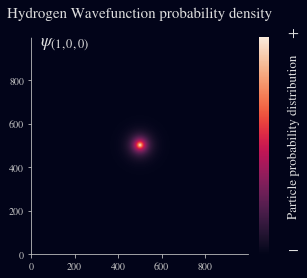

In [730]:
plot_wavefunction(m=m,n=1,l=0,Z=Z,alpha=alpha,r=r,lproy=0,dark_palette=True)

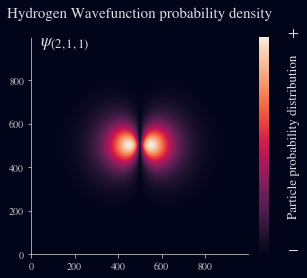

In [731]:
plot_wavefunction(m=m,n=2,l=1,Z=Z,alpha=alpha,r=r,lproy=1,dark_palette=True)

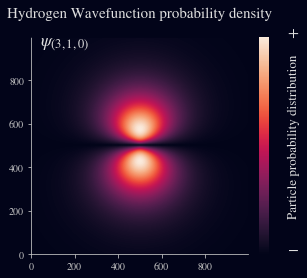

In [733]:
plot_wavefunction(m=m,n=3,l=1,Z=Z,alpha=alpha,r=r,lproy=0,dark_palette=True)